In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install plotly

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("D:/IMDb Movies India.csv", encoding='latin1')

In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
df.shape

(15509, 10)

In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
Name,0,0.0%
Year,528,3.4%
Duration,8269,53.32%
Genre,1877,12.1%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [11]:
df.drop(['Actor 2' , 'Actor 3'], axis=1, inplace=True)

In [12]:
df.dropna(subset=['Duration'], inplace = True)

In [13]:
df = df[df.isnull().sum(axis=1).sort_values(ascending=False) <=5]

In [14]:
missing_values_percent(df)

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [15]:
df.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = df['Director'].describe()

director_counts = df['Director'].value_counts().sort_values(ascending=False)
df['Director'].fillna('rajmouli', inplace=True)

genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
df['Genre'].fillna('Action', inplace=True)

actor1_description = df['Actor 1'].describe()
df['Actor 1'].fillna('mahesh babu', inplace=True)

missing_values_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


In [16]:
missing_values_percent(df)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


In [17]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [18]:
int_columns = ['Year', 'Duration']
df[int_columns] = df[int_columns].astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 342.8+ KB


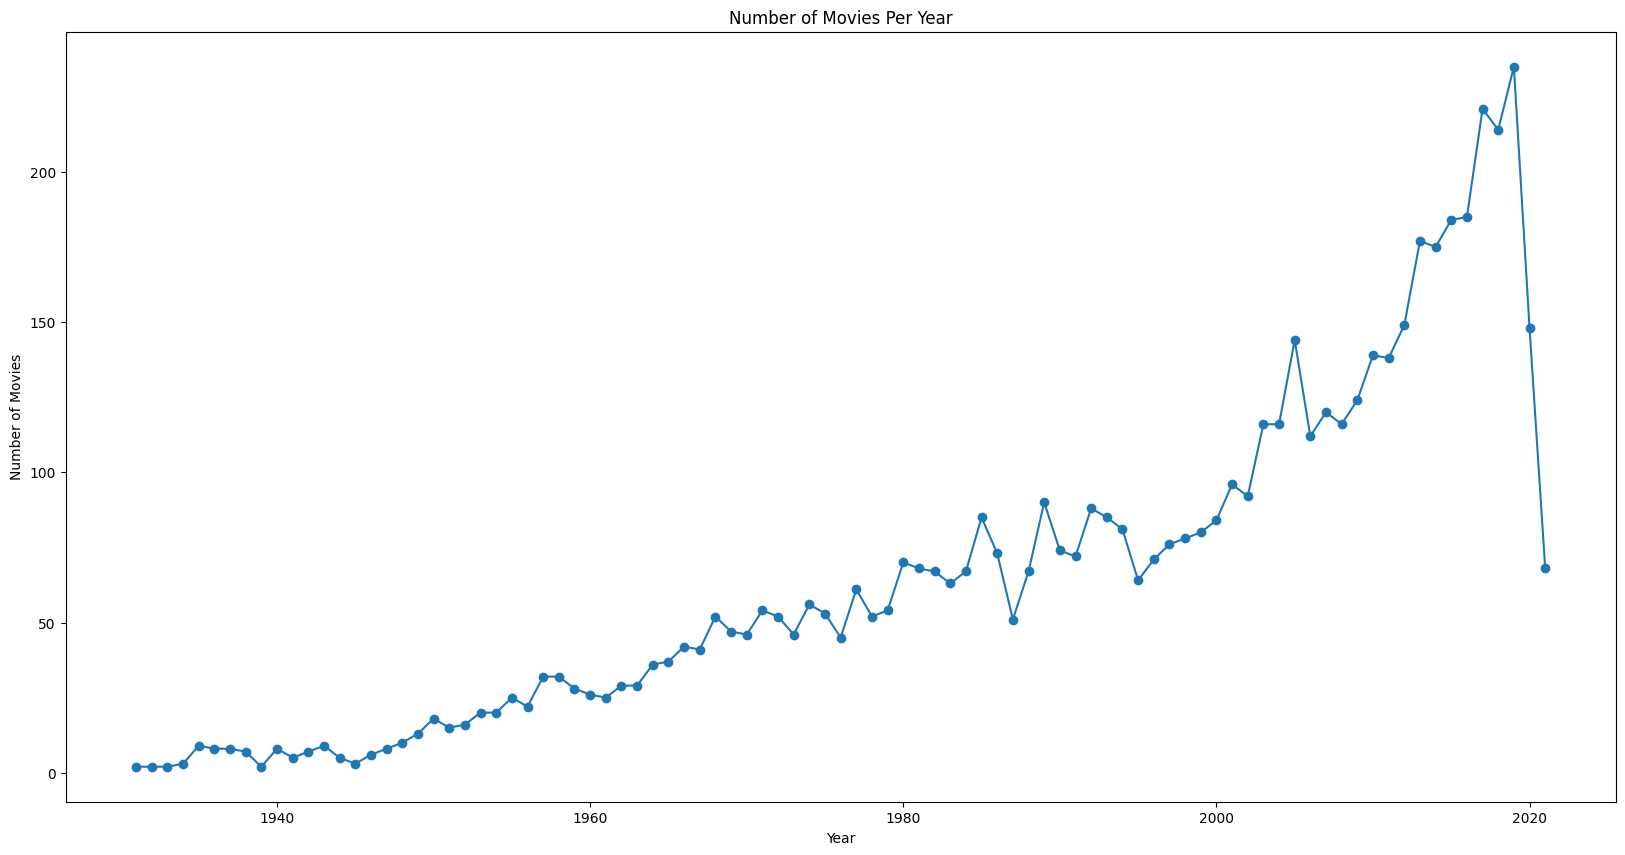

In [19]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

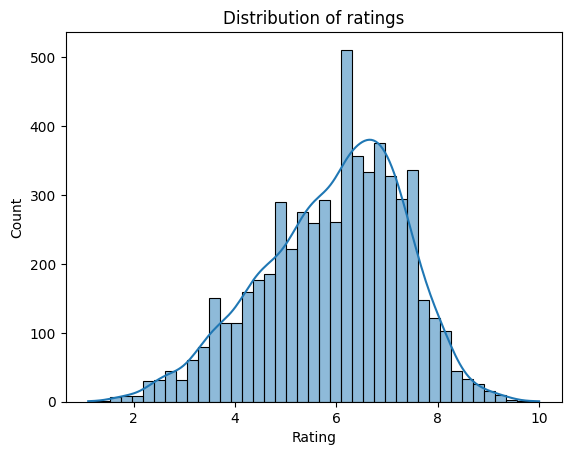

In [20]:
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

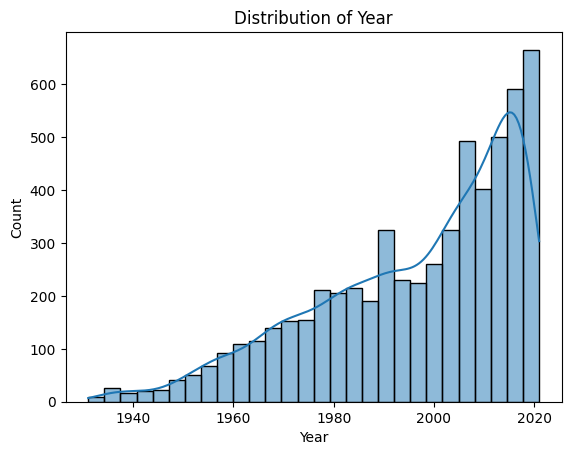

In [21]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of Year')
plt.show()

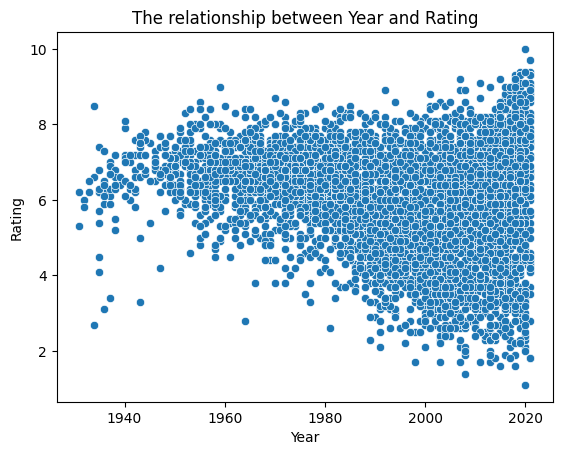

In [22]:
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The relationship between Year and Rating")
plt.show()

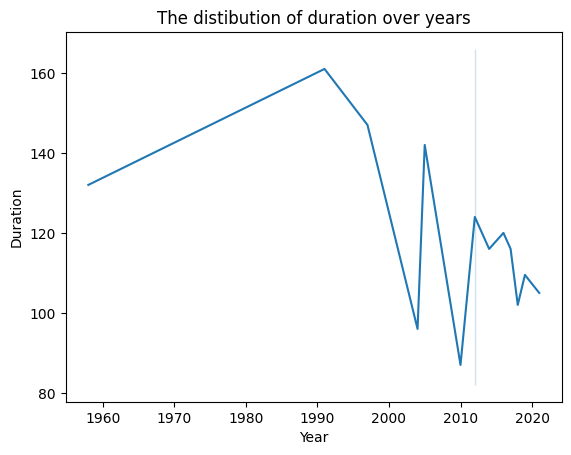

In [23]:
sns.lineplot(data=df.head(15),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

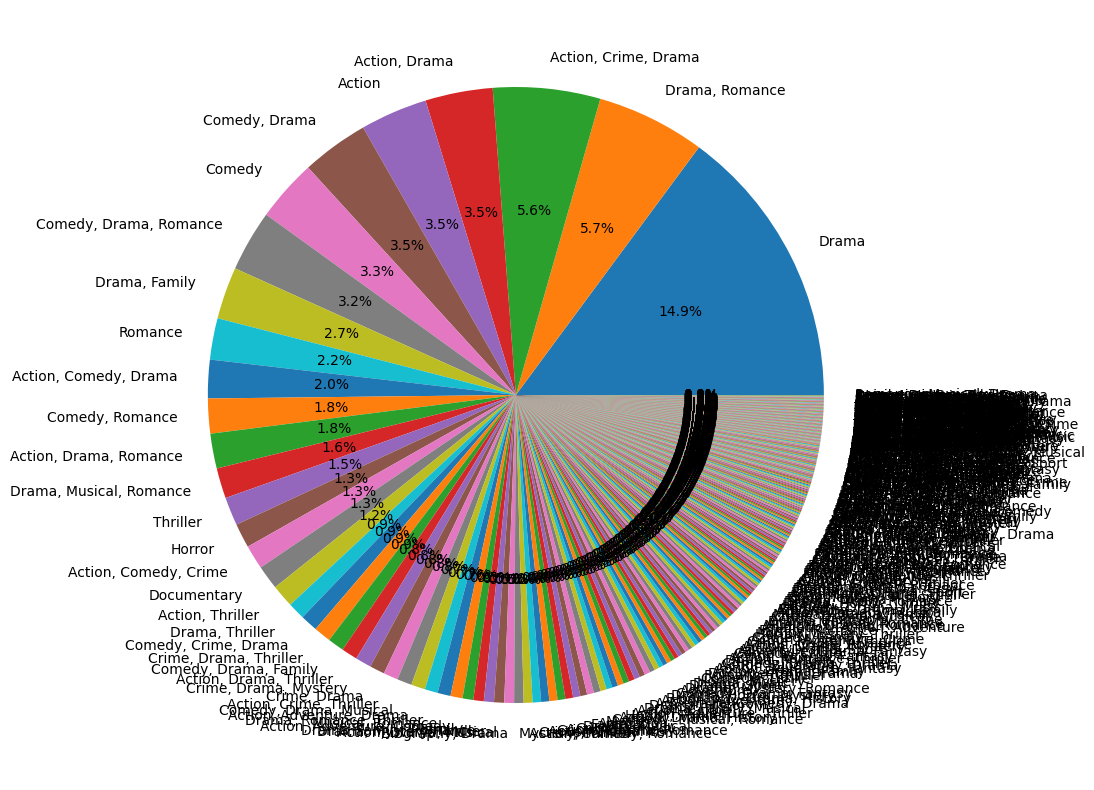

In [24]:
label = df["Genre"].value_counts().index
sizes = df["Genre"].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels= label, startangle = 0 , shadow = False , autopct='%1.1f%%')
plt.show()

Drama          3847
Action         1730
Romance        1383
Comedy         1352
Crime           878
Thriller        684
Family          428
Musical         416
Mystery         308
Adventure       284
Horror          205
Fantasy         148
Documentary     130
Biography       126
History         103
Animation        56
Music            55
Sport            44
Sci-Fi           35
War              34
News              2
Western           2
Name: count, dtype: int64
Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure', 'Horror', 'Fantasy', 'Documentary',
       'Biography', 'History', 'Animation', 'Music', 'Sport', 'Sci-Fi', 'War',
       'News', 'Western'],
      dtype='object')
[3847 1730 1383 1352  878  684  428  416  308  284  205  148  130  126
  103   56   55   44   35   34    2    2]


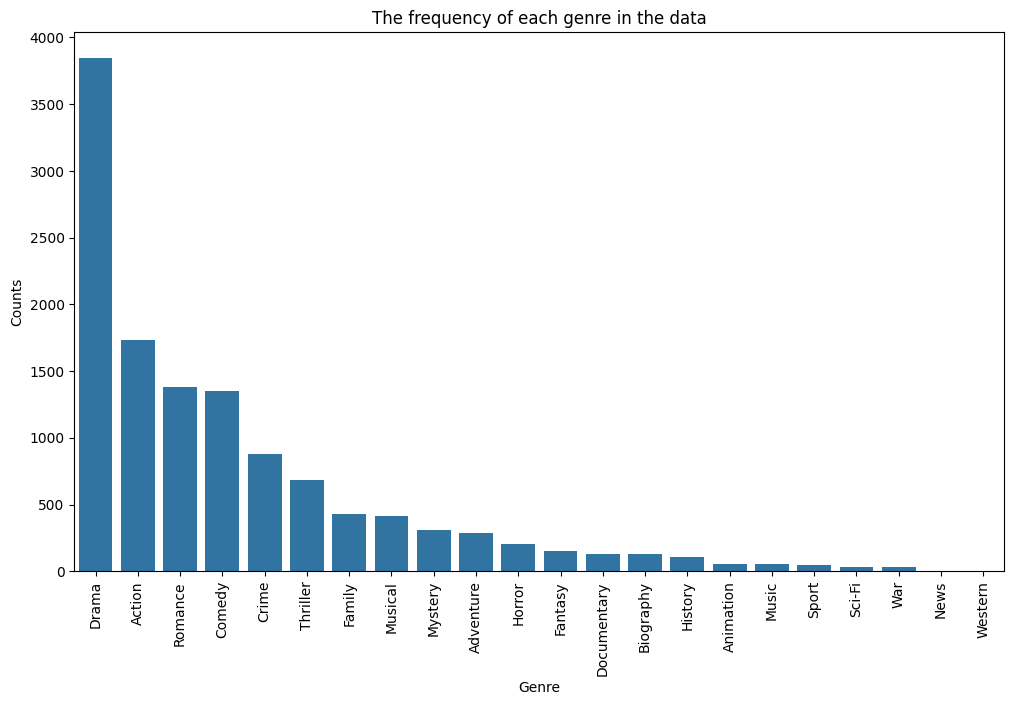

In [25]:
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
print(movies_genre)
print(labels)
print(count)
plt.figure(figsize=(12,7))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [26]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [27]:
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = df[features]
y = df['Rating']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 0.5138
Mean Absolute Error: 0.5127
R2 Score: 0.7238
